In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nih-chest-xrays-tfrecords/preprocessed_data.csv
/kaggle/input/nih-chest-xrays-tfrecords/data/254-437.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/166-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/153-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/087-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/064-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/004-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/037-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/161-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/192-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/030-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/183-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/015-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/197-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/003-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/111-438.tfrec
/kaggle/input/nih-chest-xrays-tfrecords/data/008-438.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/nih-chest-xrays-tfrecords/preprocessed_data.csv')
df.head()

,Unnamed: 0,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,../input/data/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,../input/data/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,../input/data/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,../input/data/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,../input/data/images_001/images/00000003_000.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [4]:
df.shape

(112120, 16)

In [5]:
df.T.info

<bound method DataFrame.info of                                                               0       \
Unnamed: 0          ../input/data/images_001/images/00000001_000.png   
No Finding                                                     False   
Atelectasis                                                    False   
Consolidation                                                  False   
Infiltration                                                   False   
Pneumothorax                                                   False   
Edema                                                          False   
Emphysema                                                      False   
Fibrosis                                                       False   
Effusion                                                       False   
Pneumonia                                                      False   
Pleural_Thickening                                             False   
Cardiomegaly                    

<AxesSubplot:xlabel='count', ylabel='No Finding'>

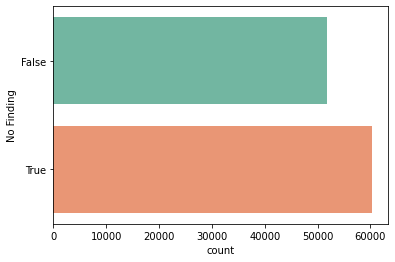

In [6]:
sns.countplot(y="No Finding", data=df, palette="Set2")

In [7]:
data= df.iloc[:,2:]

<AxesSubplot:>

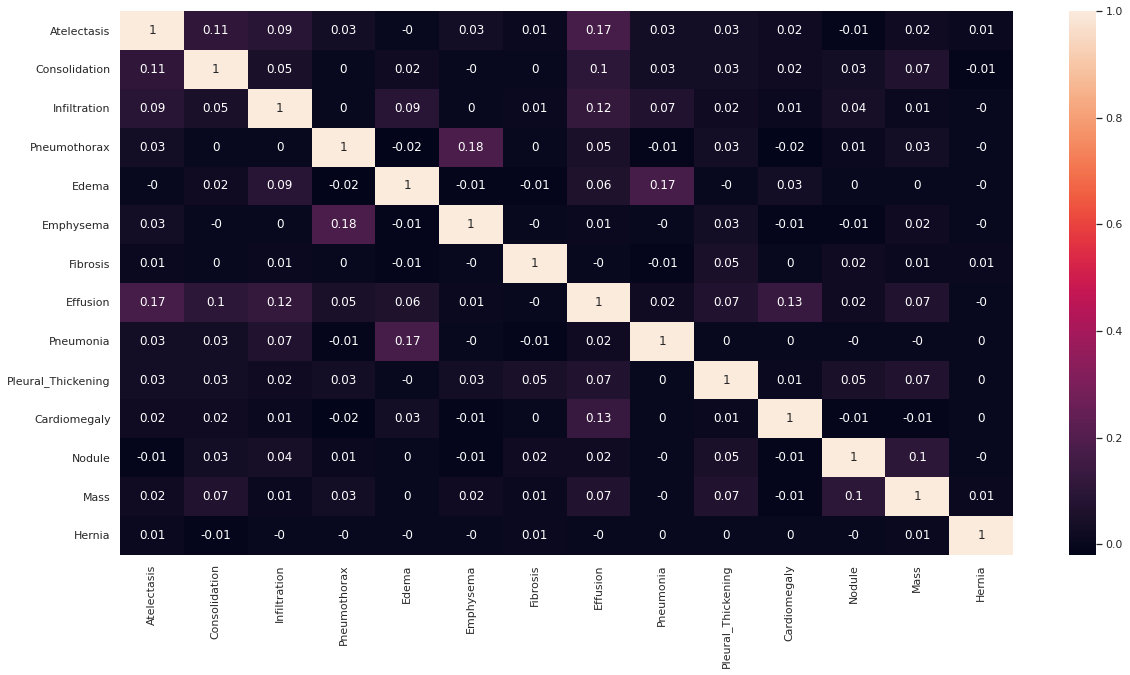

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [9]:
heads = list(df.columns)[2:]
len(heads)

14

In [10]:
dataset_dir = '/kaggle/input/nih-chest-xrays-tfrecords/'

dataset_fdr = dataset_dir + 'data/'

image = os.listdir(dataset_fdr)

print('The total images in TFRecord is ' + str(len(image)) + ' x-ray images')

The total images in TFRecord is 256 x-ray images


In [11]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [12]:
img = [dataset_fdr + x for x in image]

file_name = tf.io.gfile.glob(img)

In [13]:
#Define training and test sets (index)
ALL = list(range(len(file_name)))

train_valid = random.sample(ALL, int(len(ALL) * 0.8))
test_index = list(set(ALL) - set(train_valid))

train_index = random.sample(train_valid, int(len(train_valid) * 0.9))
valid_index = list(set(train_valid) - set(train_index))

In [14]:
#Define training and test image file names
TRAINING_FILENAMES, VALID_FILENAMES, TEST_FILENAMES = [file_name[index] for index in train_index], [file_name[index] for index in valid_index], [file_name[index] for index in test_index]
TRAINING_FILENAMES

['/kaggle/input/nih-chest-xrays-tfrecords/data/221-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/038-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/212-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/069-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/230-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/073-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/251-437.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/071-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/182-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/033-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/096-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/195-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/190-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/066-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/090-438.tfrec',
 '/kaggle/input/nih-chest-xrays-tfrecords/data/236-438.

In [15]:
print("Number of TFRecord Files in training set:", len(TRAINING_FILENAMES))
print("Number of TFRecord Files in validation set:", len(VALID_FILENAMES))
print("Number of TFRecord Files in Test Set:", len(TEST_FILENAMES))

Number of TFRecord Files in training set: 183
Number of TFRecord Files in validation set: 21
Number of TFRecord Files in Test Set: 52


In [16]:
feature_description = {}

for elem in list(df.columns)[2:]:
    feature_description[elem] = tf.io.FixedLenFeature([], tf.int64)
    
feature_description['image'] = tf.io.FixedLenFeature([], tf.string)

In [17]:
BATCH_SIZE = 32
IMAGE_ONE_AXIS = 50
IMAGE_SIZE = [IMAGE_ONE_AXIS, IMAGE_ONE_AXIS]
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [18]:
# Functions to read the data
def read_tfrecord(example):
    example = tf.io.parse_single_example(example, feature_description)
    image = tf.io.decode_jpeg(example["image"], channels=3)
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    
    label = []
    
    for val in heads:
        label.append(example[val])
    
    return image, label

In [19]:
def load_dataset(filenames):
    ignore_order = tf.data.Options()
    ignore_order.experimental_deterministic = False
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.with_options(ignore_order)
    dataset = dataset.map(read_tfrecord)
    
    return dataset

In [20]:
def get_dataset(filenames):
    dataset = load_dataset(filenames)
    dataset = dataset.shuffle(2048)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE)
    
    return dataset

In [21]:
#Define train, valid, and test datasets
train_dataset = get_dataset(TRAINING_FILENAMES)
valid_dataset = get_dataset(VALID_FILENAMES)
test_dataset = get_dataset(TEST_FILENAMES)


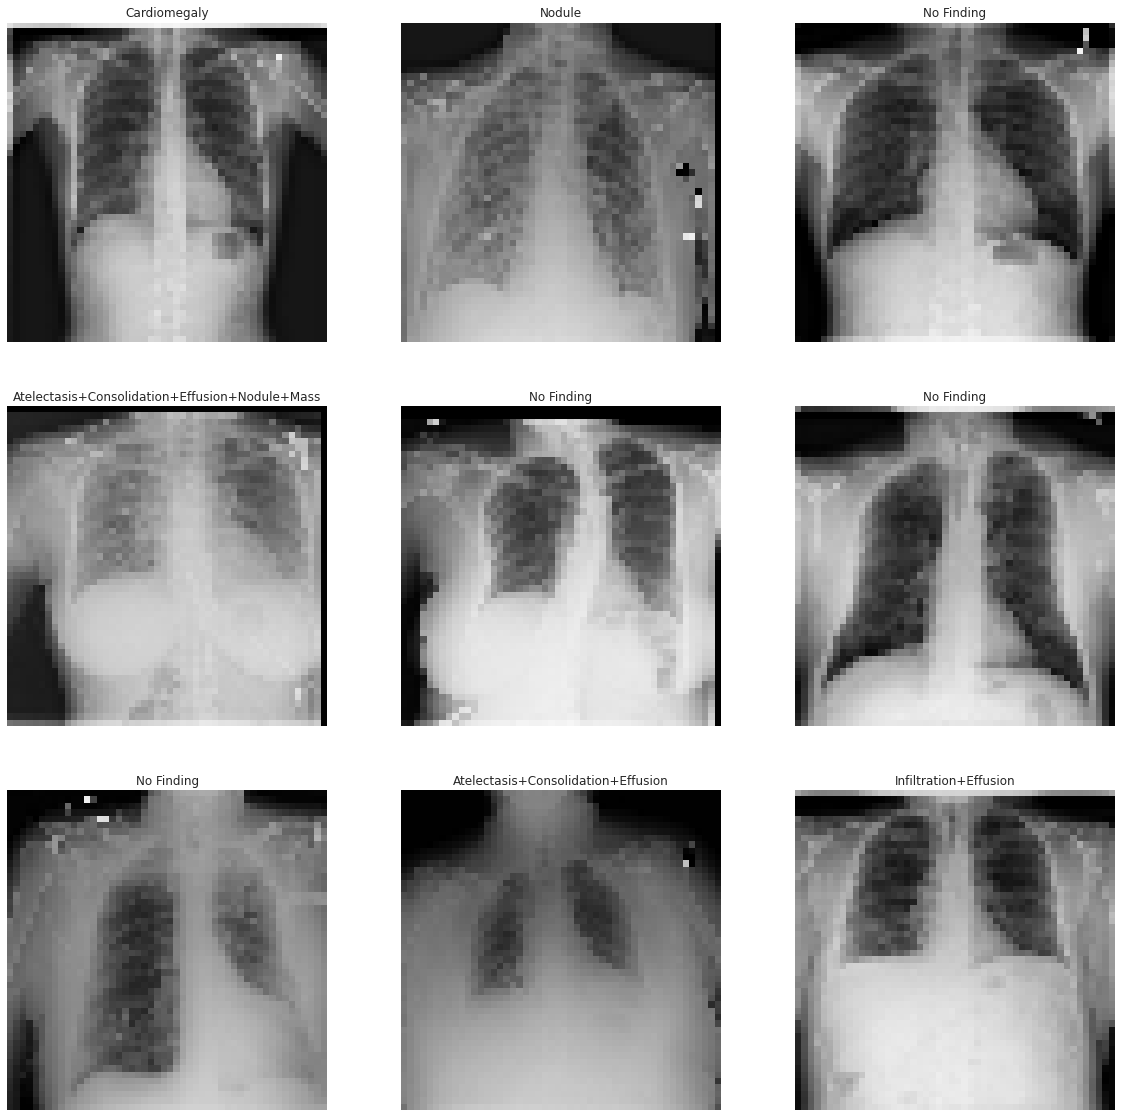

In [22]:
#Show the images for the training set to visualize
image_viz, label_viz = next(iter(train_dataset))

def show_batch(X, Y):
    plt.figure(figsize=(20, 20))
    for n in range(9):
        ax = plt.subplot(3, 3, n + 1)
        plt.imshow(X[n])
        
        result = [x for i, x in enumerate(heads) if Y[n][i]]
        title = "+".join(result)
        
        if result == []: title = "No Finding"
        
        plt.title(title)
        plt.axis("off")

show_batch(image_viz.numpy(), label_viz.numpy())


In [23]:
from numpy import load
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [24]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=5, decay_rate=0.96, staircase=True
)

In [25]:
train_size = sum(1 for _ in tf.data.TFRecordDataset(TRAINING_FILENAMES))
validation_size = sum(1 for _ in tf.data.TFRecordDataset(VALID_FILENAMES))

epoch_steps = int(np.ceil(train_size/BATCH_SIZE))
validation_steps = int(np.ceil(validation_size/BATCH_SIZE))

epochs = 5

print("batches trained per epoch: " + str(epoch_steps))
print("validation batches used per epoch: " + str(validation_steps))

batches trained per epoch: 2505
validation batches used per epoch: 288


In [26]:
def define_model(in_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), out_shape=len(heads)):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(out_shape, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=lr_schedule),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name="auc")])
    return model

In [27]:
model = define_model()

In [28]:
IMAGE_SIZE[1]

50

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        1

In [30]:
model = define_model()

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=valid_dataset,
    validation_steps = validation_steps
)

Epoch 1/10
2505/2505 [==============================] - 332s 128ms/step - loss: 0.2346 - auc: 0.6831 - val_loss: 0.1826 - val_auc: 0.7319
Epoch 2/10
2505/2505 [==============================] - 277s 108ms/step - loss: 0.1887 - auc: 0.7314 - val_loss: 0.1818 - val_auc: 0.7328
Epoch 3/10
2505/2505 [==============================] - 276s 108ms/step - loss: 0.1871 - auc: 0.7330 - val_loss: 0.1818 - val_auc: 0.7328
Epoch 4/10
2505/2505 [==============================] - 275s 107ms/step - loss: 0.1867 - auc: 0.7328 - val_loss: 0.1818 - val_auc: 0.7328
Epoch 5/10
2505/2505 [==============================] - 279s 109ms/step - loss: 0.1870 - auc: 0.7325 - val_loss: 0.1818 - val_auc: 0.7328
Epoch 6/10
2505/2505 [==============================] - 281s 110ms/step - loss: 0.1867 - auc: 0.7327 - val_loss: 0.1818 - val_auc: 0.7328
Epoch 7/10
2505/2505 [==============================] - 275s 107ms/step - loss: 0.1866 - auc: 0.7328 - val_loss: 0.1818 - val_auc: 0.7328
Epoch 8/10
2505/2505 [============

In [31]:
from keras.callbacks import History

In [32]:
history.history

{'loss': [0.19650126993656158,
  0.18652941286563873,
  0.18631769716739655,
  0.18631741404533386,
  0.18631772696971893,
  0.18631769716739655,
  0.1863175481557846,
  0.18631772696971893,
  0.1863177865743637,
  0.18631786108016968],
 'auc': [0.7193889021873474,
  0.7336772084236145,
  0.733872652053833,
  0.733872652053833,
  0.733872652053833,
  0.733872652053833,
  0.733872652053833,
  0.733872652053833,
  0.733872652053833,
  0.733872652053833],
 'val_loss': [0.18261809647083282,
  0.18183578550815582,
  0.18183571100234985,
  0.18183580040931702,
  0.18183574080467224,
  0.18183572590351105,
  0.18183577060699463,
  0.18183566629886627,
  0.18183575570583344,
  0.18183580040931702],
 'val_auc': [0.731949508190155,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551,
  0.7327960133552551]}

In [33]:
training_aucs = history.history['auc']
training_aucs

[0.7193889021873474,
 0.7336772084236145,
 0.733872652053833,
 0.733872652053833,
 0.733872652053833,
 0.733872652053833,
 0.733872652053833,
 0.733872652053833,
 0.733872652053833,
 0.733872652053833]

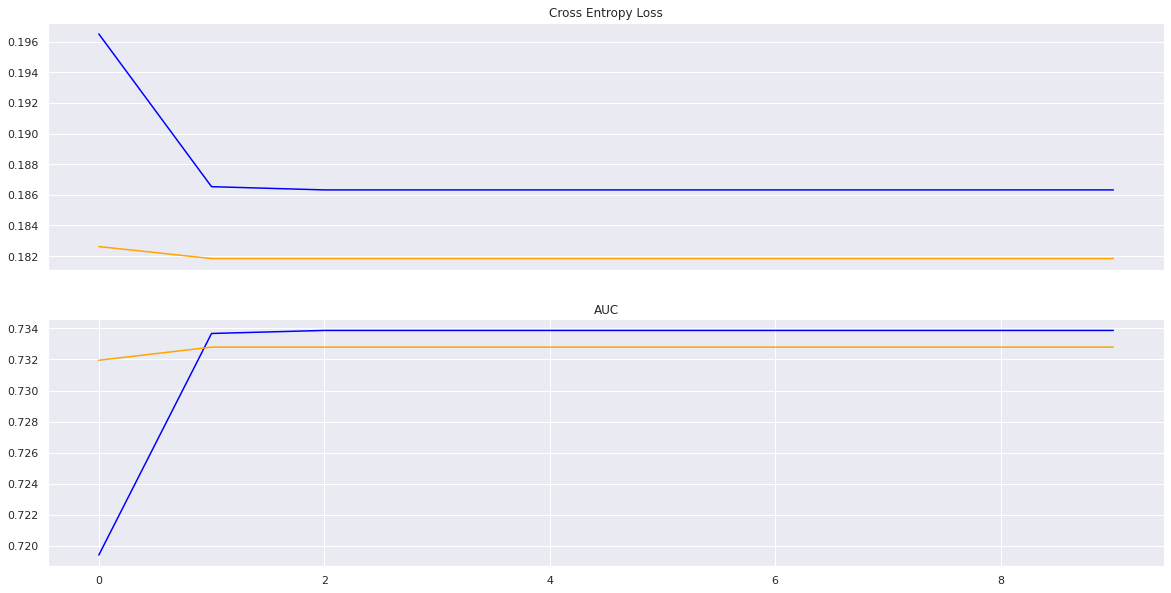

In [34]:
# plot loss
ax = plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
ax.axes.xaxis.set_visible(False)

# plot accuracy
plt.subplot(212)
plt.title('AUC')
plt.plot(history.history['auc'], color='blue', label='train')
plt.plot(history.history['val_auc'], color='orange', label='validation')

In [35]:
preds = model.predict(test_dataset, verbose=0)

In [36]:
_, test_auc = model.evaluate(test_dataset, verbose=0)

print('Test auc:', test_auc)

Test auc: 0.7348697781562805
